Data source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

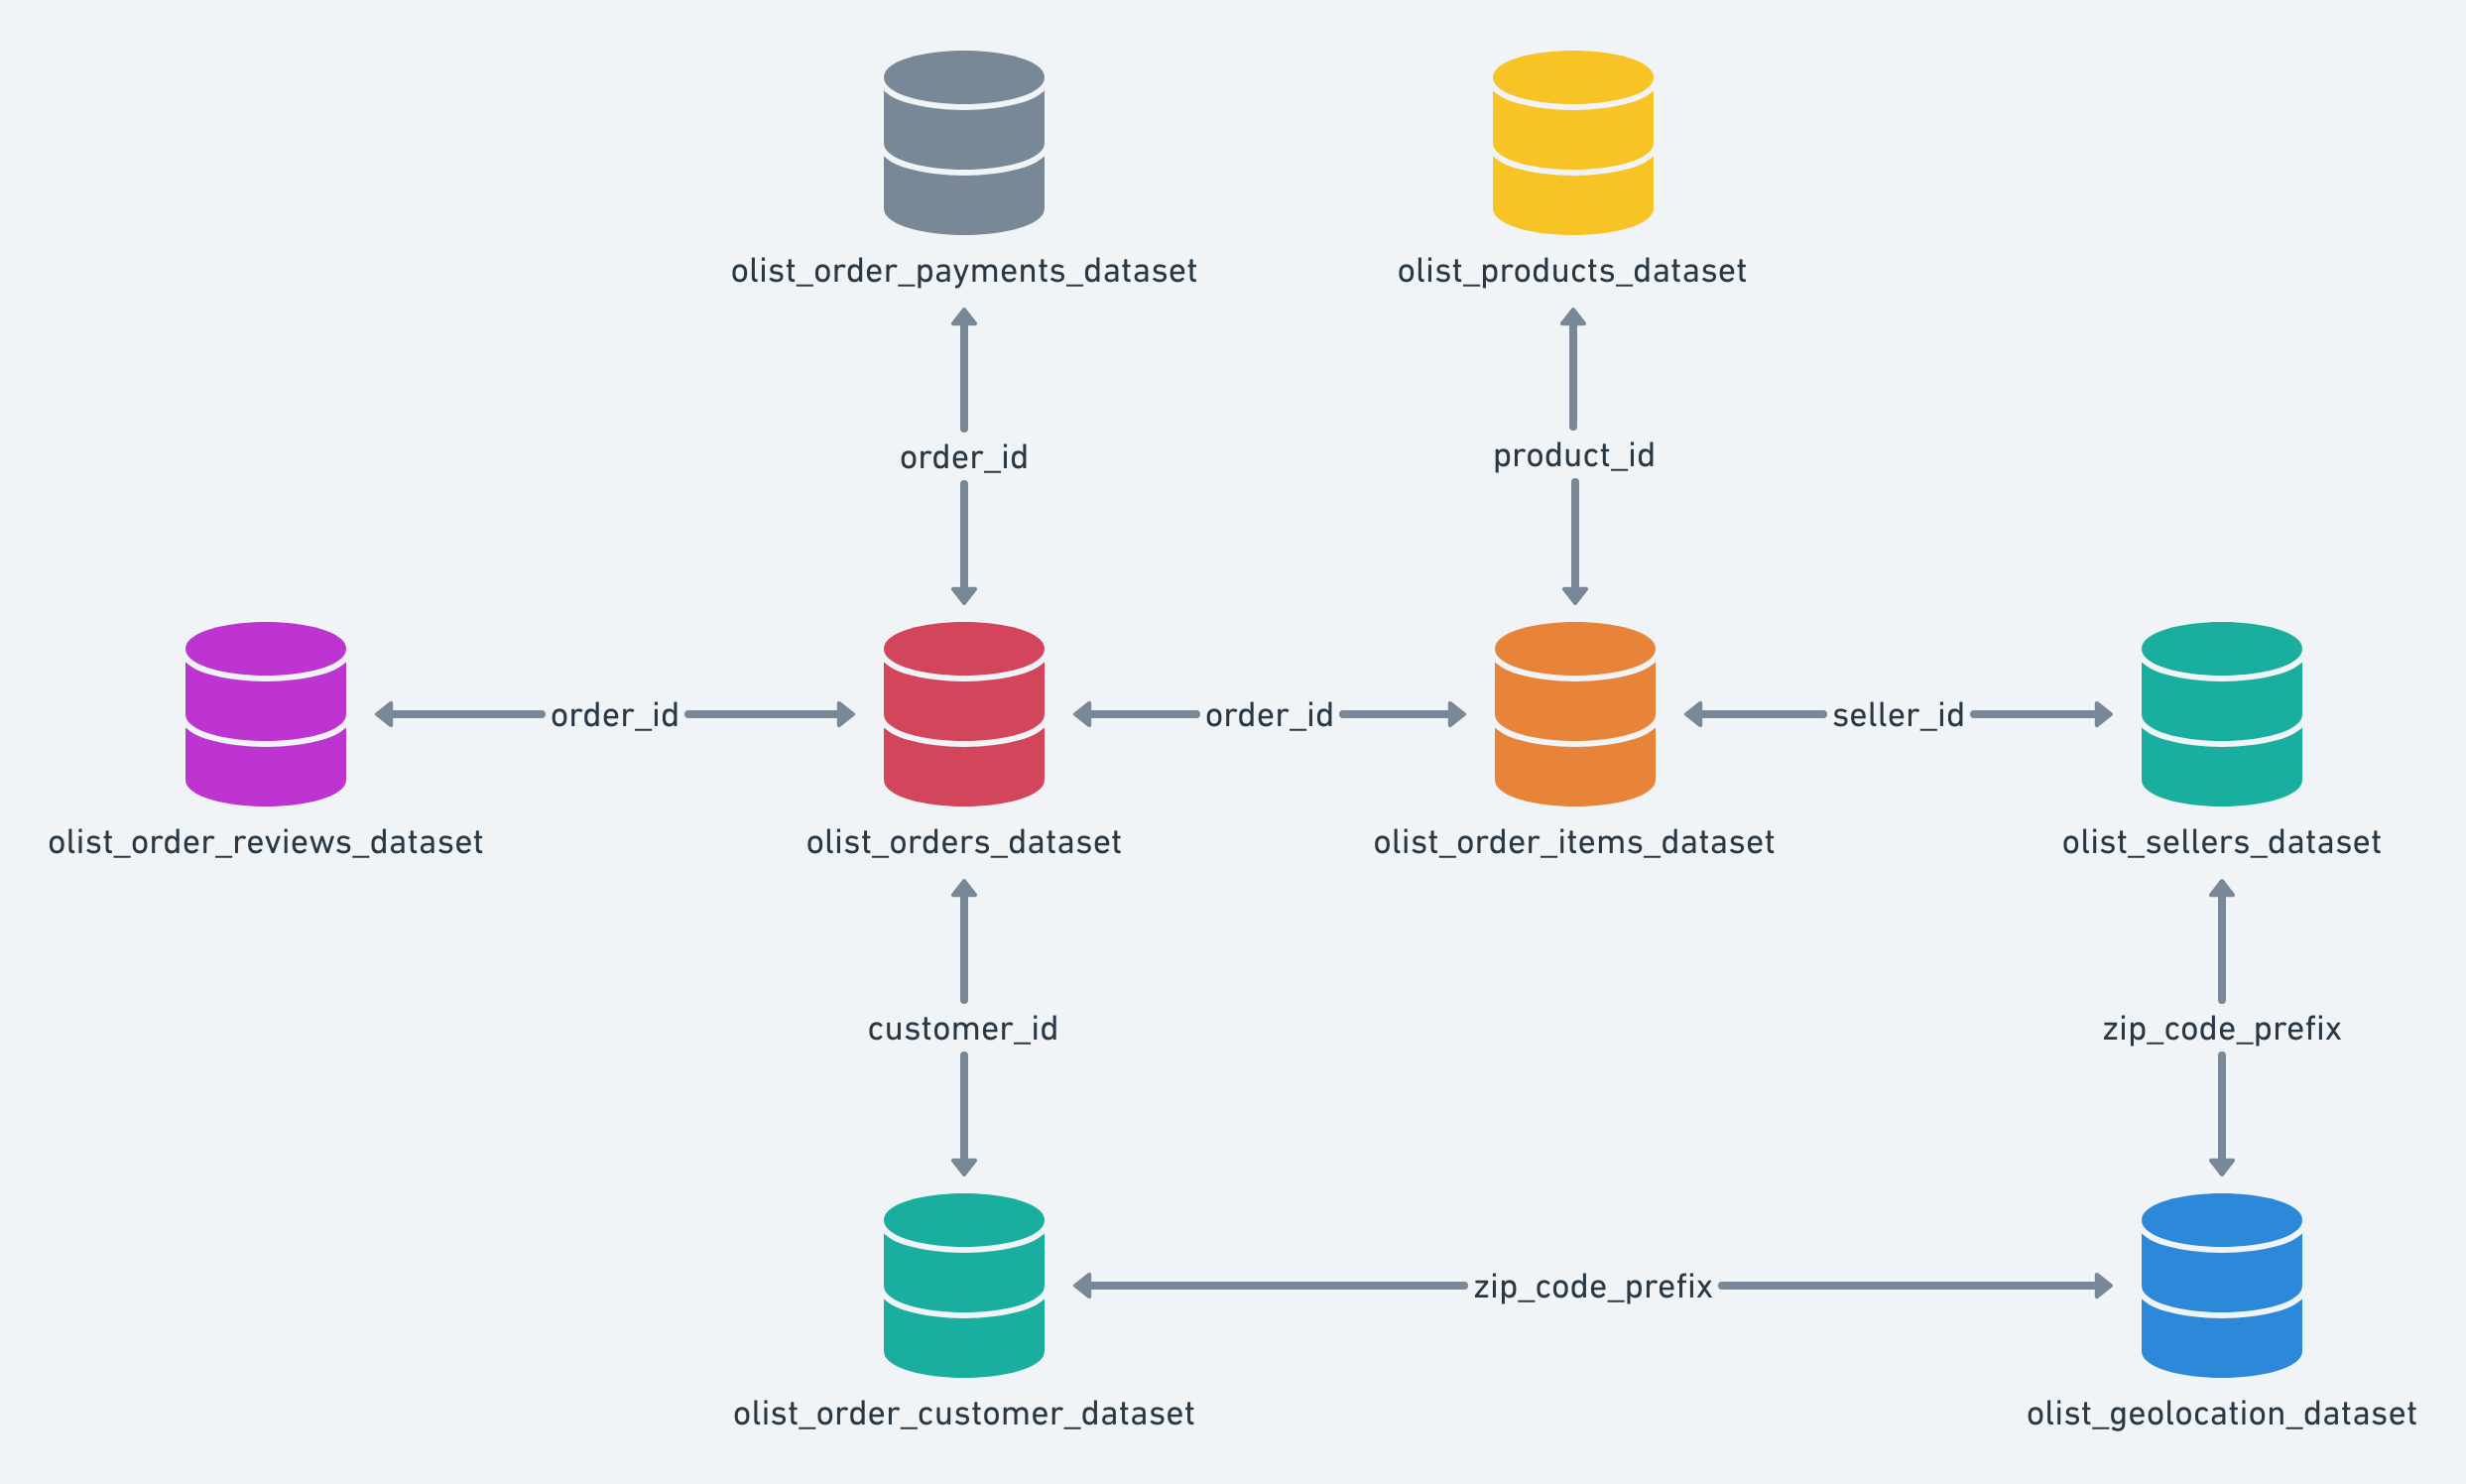

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [112]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "seaborn"

## Orders

In [4]:
df_orders = pd.read_csv("olist_orders_dataset.csv")

In [5]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [7]:
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"])
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"])

In [8]:
df_orders.groupby(["order_status"])["order_id"].count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

In [9]:
byDate = df_orders.groupby([df_orders['order_purchase_timestamp'].dt.date])["order_id"].count()
byDate = byDate.reset_index()
byDate

,order_purchase_timestamp,order_id
0,2016-09-04,1
1,2016-09-05,1
2,2016-09-13,1
3,2016-09-15,1
4,2016-10-02,1
...,...,...
629,2018-09-29,1
630,2018-10-01,1
631,2018-10-03,1
632,2018-10-16,1


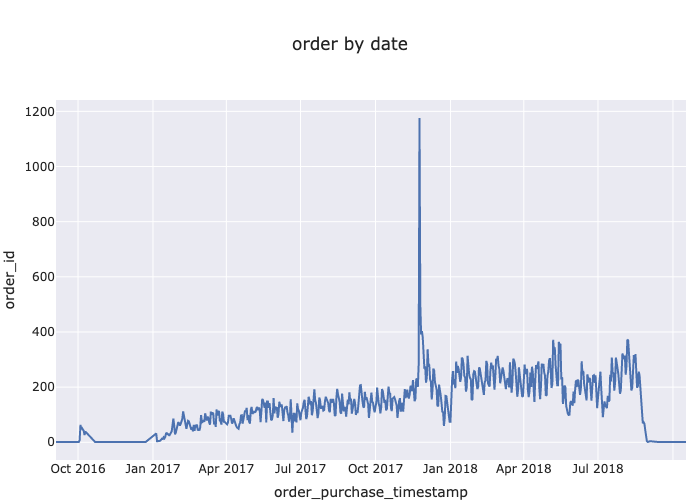

In [31]:
fig = px.line(byDate, x='order_purchase_timestamp', y='order_id', title='order by date')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

Cleaning: exclude the orders before Jan 2017 and after Aug 2018:

In [11]:
df_orders_01 = df_orders[(df_orders["order_purchase_timestamp"] >= pd.Timestamp(2017,1,1)) 
                      & (df_orders["order_purchase_timestamp"] <= pd.Timestamp(2018,8,31))]
df_orders_01

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [12]:
byDate_01 = df_orders_01.groupby([df_orders_01['order_purchase_timestamp'].dt.date])["order_id"].count().reset_index()
byDate_01.to_csv("byDate.csv")

In [13]:
byMonth = df_orders_01.groupby([df_orders['order_purchase_timestamp'].dt.to_period('M')])["order_id"].count().reset_index()
byMonth

,order_purchase_timestamp,order_id
0,2017-01,800
1,2017-02,1780
2,2017-03,2682
3,2017-04,2404
4,2017-05,3700
5,2017-06,3245
6,2017-07,4026
7,2017-08,4331
8,2017-09,4285
9,2017-10,4631


In [14]:
df_orders_01["weekday"] = df_orders_01['order_purchase_timestamp'].dt.weekday
df_orders_01["hour"] = df_orders_01['order_purchase_timestamp'].dt.hour

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_6990/312471368.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_6990/312471368.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
df_orders_01["weekday"] = df_orders_01["weekday"].astype("string")
df_orders_01 = df_orders_01.replace({'weekday': {"0": "Mon", "1": "Tue", "2": "Wed", "3": "Thu", 
                            "4": "Fri", "5": "Sat", "6": "Sun"}})

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_6990/3815919838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
byWeekday = df_orders_01.groupby([df_orders_01['order_purchase_timestamp'].dt.weekday])["order_id"].count().reset_index()
byHour = df_orders_01.groupby([df_orders_01['order_purchase_timestamp'].dt.hour])["order_id"].count().reset_index()

In [17]:
byWkdHr = df_orders_01.groupby(["weekday", "hour"]).count()["order_id"].unstack()
byWkdHr

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Fri,425,216,71,49,40,36,97,206,490,766,...,956,977,971,814,722,781,738,723,698,510
Mon,326,134,65,36,19,22,69,158,478,777,...,1093,1072,1089,988,924,945,1027,1116,987,717
Sat,315,174,66,43,24,24,53,105,246,431,...,675,718,696,699,708,756,726,650,546,428
Sun,266,141,69,44,27,27,34,105,205,349,...,684,714,712,797,895,899,967,888,863,603
Thu,353,167,74,39,31,28,85,218,500,754,...,974,926,1073,906,780,824,835,840,854,549
Tue,306,158,80,28,29,24,71,223,522,861,...,1119,1039,1074,965,874,919,985,1023,961,687
Wed,396,178,81,33,33,27,93,210,512,827,...,1046,980,1039,961,850,847,900,961,873,614


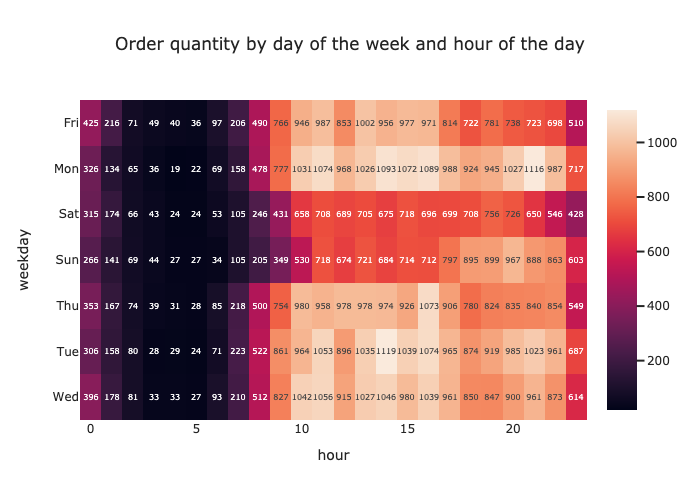

In [84]:
fig = px.imshow(byWkdHr, text_auto=True, height = 500,
               title="Order quantity by day of the week and hour of the day")
#fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byWkdHr-heatmap.html")

In [132]:
byWkdHr.to_csv("byWkHr.csv")

## Payment

In [20]:
df_payments = pd.read_csv("olist_order_payments_dataset.csv")

- payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.
- payment_type: method of payment chosen by the customer.
- payment_installments: number of installments chosen by the customer.
- payment_value: transaction value.

In [21]:
df_payments["order_id"].nunique()

99440

In [22]:
df_payments_total = df_payments.groupby('order_id')['payment_value'].sum().reset_index()
df_payments_total

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [23]:
df_all = df_orders_01.merge(df_payments_total, how = "left", on = "order_id")
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,hour,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Mon,10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tue,20,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wed,8,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Sat,19,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tue,21,28.62
...,...,...,...,...,...,...,...,...,...,...,...
99086,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Thu,9,85.08
99087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tue,12,195.00
99088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sun,14,271.01
99089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Mon,21,441.16


In [24]:
byMonth_revenue = df_all.groupby([df_all['order_purchase_timestamp'].dt.to_period('M')])["payment_value"].sum().reset_index()
byMonth_revenue

,order_purchase_timestamp,payment_value
0,2017-01,138488.04
1,2017-02,291908.01
2,2017-03,449863.60
3,2017-04,417788.03
4,2017-05,592918.82
5,2017-06,511276.38
6,2017-07,592382.92
7,2017-08,674396.32
8,2017-09,727762.45
9,2017-10,779677.88


In [26]:
byMonth_revenue['order_purchase_timestamp'] = byMonth_revenue['order_purchase_timestamp'].astype('string')

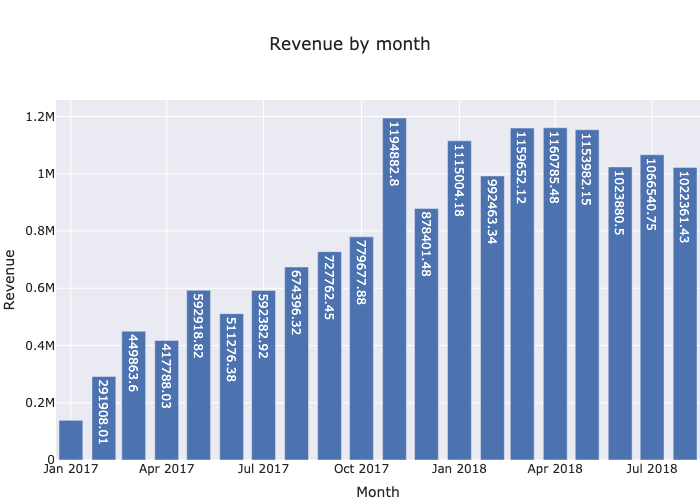

In [86]:
fig = px.bar(byMonth_revenue, x='order_purchase_timestamp', y='payment_value', text='payment_value',
             labels={'order_purchase_timestamp':'Month', 'payment_value':'Revenue'}, height=500,
             title='Revenue by month')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")
fig.write_html("visuals/byMonth_revenue.html")

In [34]:
byMonth_revenue['MonthlyGrowth'] = (byMonth_revenue['payment_value'].pct_change()*100).round(2)
byMonth_revenue

,order_purchase_timestamp,payment_value,MonthlyGrowth
0,2017-01,138488.04,NaN
1,2017-02,291908.01,110.78
2,2017-03,449863.60,54.11
3,2017-04,417788.03,-7.13
4,2017-05,592918.82,41.92
5,2017-06,511276.38,-13.77
6,2017-07,592382.92,15.86
7,2017-08,674396.32,13.84
8,2017-09,727762.45,7.91
9,2017-10,779677.88,7.13


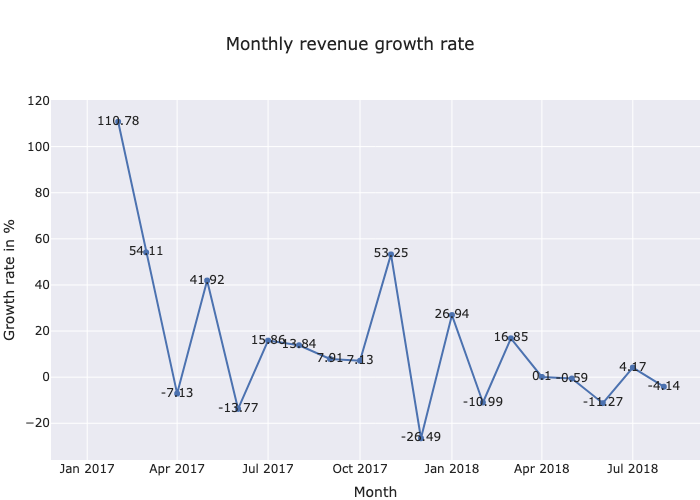

In [79]:
fig = px.line(byMonth_revenue, x='order_purchase_timestamp', y='MonthlyGrowth', text='MonthlyGrowth',
              labels={'order_purchase_timestamp':'Month', 'MonthlyGrowth':'Growth rate in %'}, height=500,
              title='Monthly revenue growth rate')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
fig.write_html("visuals/byMonth_revenue_growth.html")

## Customer

- customer_id: key to the orders dataset. Each order has a unique customer_id.
- customer_unique_id: unique identifier of a customer.
- customer_zip_code_prefix: first five digits of customer zip code.
- customer_city: customer city name
- customer_state: customer state

In [36]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Find each customer's first order

In [37]:
df_all = df_all.merge(df_customers, how = 'left', on = 'customer_id')
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,hour,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Mon,10,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tue,20,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wed,8,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Sat,19,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tue,21,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99086,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Thu,9,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tue,12,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sun,14,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Mon,21,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [38]:
df_first_order = df_all.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
df_first_order.columns = ['customer_unique_id','first_order_date']
df_first_order

,customer_unique_id,first_order_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
95768,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
95769,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
95770,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
95771,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [39]:
newCus = df_first_order.groupby([df_first_order['first_order_date'].dt.to_period('M')])["customer_unique_id"].count().reset_index()
newCus.columns = ['first_order_month','new_customer_count']

In [40]:
newCus['first_order_month'] = newCus['first_order_month'].astype('string')

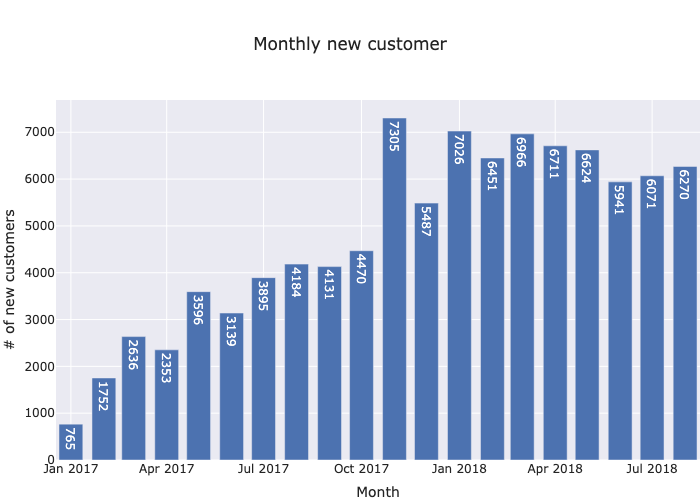

In [102]:
fig = px.bar(newCus, x='first_order_month', y='new_customer_count', text='new_customer_count',
              labels={'first_order_month':'Month', 'new_customer_count':'# of new customers'}, height=500,
              title='Monthly new customer')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")
fig.write_html("visuals/byMonth_newCus.html")

In [74]:
newCus['MonthlyGrowth'] = (newCus['new_customer_count'].pct_change()*100).round(2)
newCus

,first_order_month,new_customer_count,MonthlyGrowth
0,2017-01,765,NaN
1,2017-02,1752,129.02
2,2017-03,2636,50.46
3,2017-04,2353,-10.74
4,2017-05,3596,52.83
5,2017-06,3139,-12.71
6,2017-07,3895,24.08
7,2017-08,4184,7.42
8,2017-09,4131,-1.27
9,2017-10,4470,8.21


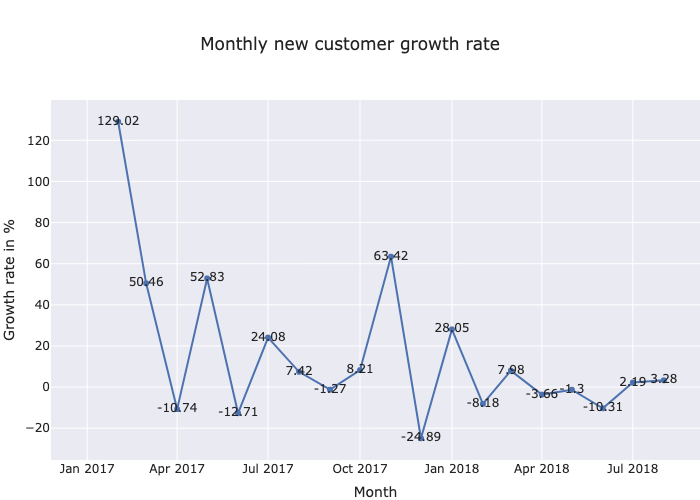

In [101]:
fig = px.line(newCus, x='first_order_month', y='MonthlyGrowth', text='MonthlyGrowth',
              labels={'first_order_month':'Month', 'MonthlyGrowth':'Growth rate in %'}, height=500,
              title='Monthly new customer growth rate')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
fig.write_html("visuals/byMonth_newCus_growth.html")

In [42]:
df_all = df_all.merge(df_first_order, how = 'left', on = "customer_unique_id")

In [43]:
df_all['usertype'] = 'New'
df_all.loc[df_all['order_purchase_timestamp'] > df_all['first_order_date'],'usertype'] = 'Return'
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weekday,hour,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_order_date,usertype
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,Mon,10,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09-04 11:26:38,Return
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,Tue,20,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07-24 20:41:37,New
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,Wed,8,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08-08 08:38:49,New
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,Sat,19,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-18 19:28:06,New
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,Tue,21,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-13 21:18:39,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99086,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,Thu,9,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03-09 09:54:05,New
99087,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,Tue,12,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02-06 12:58:58,New
99088,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,Sun,14,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08-27 14:46:43,New
99089,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,Mon,21,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01-08 21:28:27,New


In [45]:
df_order_customer = df_all.groupby([df_all['order_purchase_timestamp'].dt.to_period('M'), 
                                       'usertype'])['order_id'].count().reset_index()
df_order_customer['order_purchase_timestamp'] = df_order_customer['order_purchase_timestamp'].astype("string")
df_order_customer

,order_purchase_timestamp,usertype,order_id
0,2017-01,New,772
1,2017-01,Return,28
2,2017-02,New,1755
3,2017-02,Return,25
4,2017-03,New,2642
5,2017-03,Return,40
6,2017-04,New,2359
7,2017-04,Return,45
8,2017-05,New,3613
9,2017-05,Return,87


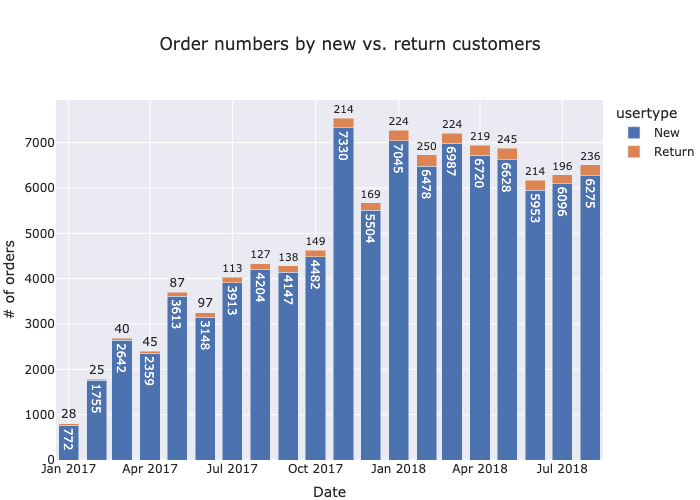

In [100]:
fig = px.bar(df_order_customer, x='order_purchase_timestamp', y='order_id', text='order_id',
              color="usertype", barmode = 'stack', height = 500,
              labels={'order_purchase_timestamp':'Date', 'order_id':'# of orders'}, 
              title='Order numbers by new vs. return customers')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
fig.write_html("visuals/byMonth_order_number_new_vs_return.html")

In [47]:
df_revenue_customer = df_all.groupby([df_all['order_purchase_timestamp'].dt.to_period('M'), 
                                         'usertype'])['payment_value'].sum().reset_index()

df_revenue_customer['order_purchase_timestamp'] = df_revenue_customer['order_purchase_timestamp'].astype('string')
df_revenue_customer

,order_purchase_timestamp,usertype,payment_value
0,2017-01,New,136090.70
1,2017-01,Return,2397.34
2,2017-02,New,288727.15
3,2017-02,Return,3180.86
4,2017-03,New,445317.33
5,2017-03,Return,4546.27
6,2017-04,New,410308.73
7,2017-04,Return,7479.30
8,2017-05,New,578326.48
9,2017-05,Return,14592.34


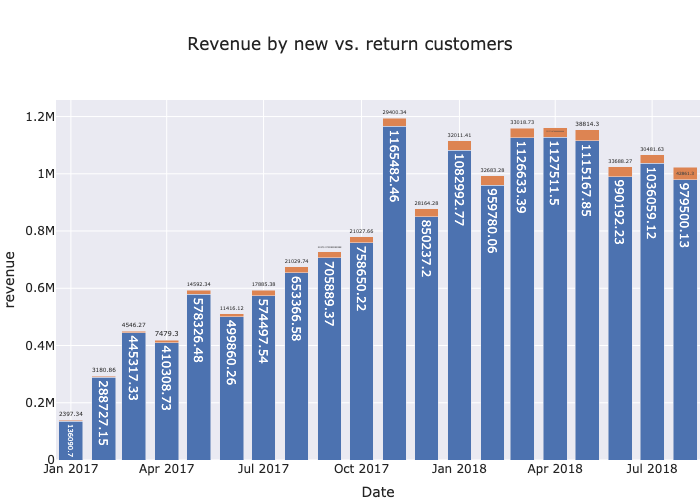

In [104]:
fig = px.bar(df_revenue_customer, x='order_purchase_timestamp', y='payment_value', text='payment_value',
              color="usertype", barmode = 'stack', height = 500,
              labels={'order_purchase_timestamp':'Date', 'payment_value':'revenue'}, 
              title='Revenue by new vs. return customers')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.update_layout(showlegend=False)
#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")
fig.write_html("visuals/byMonth_revenue_number_new_vs_return.html")

In [106]:
df_revenue_newCus = df_revenue_customer[df_revenue_customer["usertype"]=="New"]
df_revenue_returnCus = df_revenue_customer[df_revenue_customer["usertype"]=="Return"]

In [107]:
df_revenue_newCus['MonthlyGrowth'] = (df_revenue_newCus['payment_value'].pct_change()*100).round(2)
df_revenue_returnCus['MonthlyGrowth'] = (df_revenue_returnCus['payment_value'].pct_change()*100).round(2)

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_6990/1308263381.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_6990/1308263381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



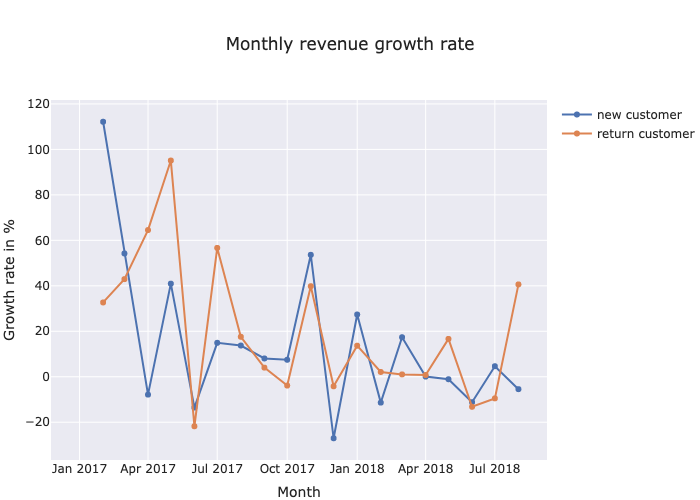

In [126]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_revenue_newCus["order_purchase_timestamp"], 
                         y=df_revenue_newCus["MonthlyGrowth"],
                         mode='lines+markers',
                         name='new customer'))
fig.add_trace(go.Scatter(x=df_revenue_returnCus["order_purchase_timestamp"], 
                         y=df_revenue_returnCus["MonthlyGrowth"],
                         mode='lines+markers',
                         name='return customer'))

fig.update_layout(title='Monthly revenue growth rate',
                   xaxis_title='Month', height = 500,
                   yaxis_title='Growth rate in %')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
#fig.show()
#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
fig.write_html("visuals/byMonth_revenue_growth_new_vs_return.html")

In [91]:
byDate_order = df_all.groupby([df_all['order_purchase_timestamp'].dt.date, 
                                 df_all['usertype']])["order_id"].count().reset_index()
byDate_order

fig = px.line(byDate_order, x='order_purchase_timestamp', y='order_id', color='usertype',
              labels={'order_purchase_timestamp':'Date', 'order_id':'# of orders'}, height = 500,
              title='Order number by date')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
fig.write_html("visuals/byDate-order.html")

,order_purchase_timestamp,usertype,order_id
0,2017-01-05,New,18
1,2017-01-05,Return,14
2,2017-01-06,New,4
3,2017-01-07,New,4
4,2017-01-08,New,6
...,...,...,...
1144,2018-08-27,Return,4
1145,2018-08-28,New,39
1146,2018-08-28,Return,5
1147,2018-08-29,New,14


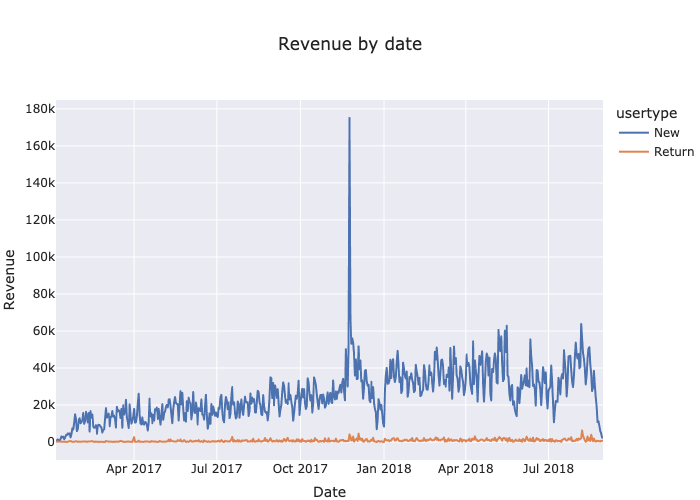

In [98]:
fig = px.line(byDate_revenue, x='order_purchase_timestamp', y='payment_value', color='usertype',
              labels={'order_purchase_timestamp':'Date', 'payment_value':'Revenue'}, height = 500,
              title='Revenue by date')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
#fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
fig.write_html("visuals/byDate-revenue.html")

In [95]:
byMonth_revenue = df_all.groupby([df_all['order_purchase_timestamp'].dt.to_period('M'), 
                                 "usertype"])["payment_value"].sum().reset_index()
byMonth_revenue

,order_purchase_timestamp,usertype,payment_value
0,2017-01,New,136090.70
1,2017-01,Return,2397.34
2,2017-02,New,288727.15
3,2017-02,Return,3180.86
4,2017-03,New,445317.33
5,2017-03,Return,4546.27
6,2017-04,New,410308.73
7,2017-04,Return,7479.30
8,2017-05,New,578326.48
9,2017-05,Return,14592.34


## Order Items
- order_id: order unique identifier
- order_item_id: sequential number identifying number of items included in the same order
- product_id: product unique identifier
- seller_id: seller unique identifier
- shipping_limit_date: the seller shipping limit date for handling the order over to the logistic partner.
- price: item price
- freight_value: item freight value item (if an order has more than one item the freight value is splitted between items)

In [49]:
df_order_items = pd.read_csv("olist_order_items_dataset.csv")
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Number of items per order:

In [50]:
no_items = df_order_items.groupby("order_id")["product_id"].count().reset_index()
no_items.rename(columns={'product_id':'no_of_items'}, inplace=True)
no_items.describe()

,no_of_items
count,98666.000000
mean,1.141731
std,0.538452
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


array([[<AxesSubplot:title={'center':'no_of_items'}>]], dtype=object)

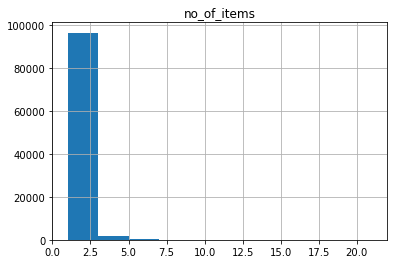

In [51]:
no_items.hist()

Price and freight value for each order

In [52]:
total = df_order_items.groupby("order_id").agg({"price":"sum", "freight_value":"sum"}).reset_index()
total

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72


In [53]:
df_all = df_all.merge(no_items, how = "left", on = "order_id")

In [54]:
df_all = df_all.merge(total, how = "left", on = "order_id")

## Geo location

In [55]:
df_geo = pd.read_csv("olist_geolocation_dataset.csv")
df_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [46]:
df_geo["geolocation_zip_code_prefix"].nunique()

19015

**It seems that the df_geo data lacks PK to match with customer and seller ID**

In [56]:
import json
from urllib.request import urlopen

Load geo data for Brazil

In [57]:
with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson') as response:
    Brazil = json.load(response)

In [58]:
state_id_map = {}
for feature in Brazil['features']:
    feature['id'] = feature['properties']['name']
    state_id_map[feature['properties']['sigla']] = feature['id']

### Number of customers in each state

In [59]:
df_geo_cus = df_all.groupby(["customer_state"]).agg({"customer_unique_id":"nunique", 
                                                     "payment_value":"sum",
                                                     "order_id":"count"}).reset_index()
df_geo_cus.rename(columns={"customer_state":'State','customer_unique_id':'Customer number', 
                           "payment_value":"Total sales",'order_id':'Order number'}, inplace=True)

In [60]:
df_geo_cus.replace({"State":state_id_map}, inplace = True)

In [61]:
df_all.replace({"customer_state":state_id_map}, inplace = True)

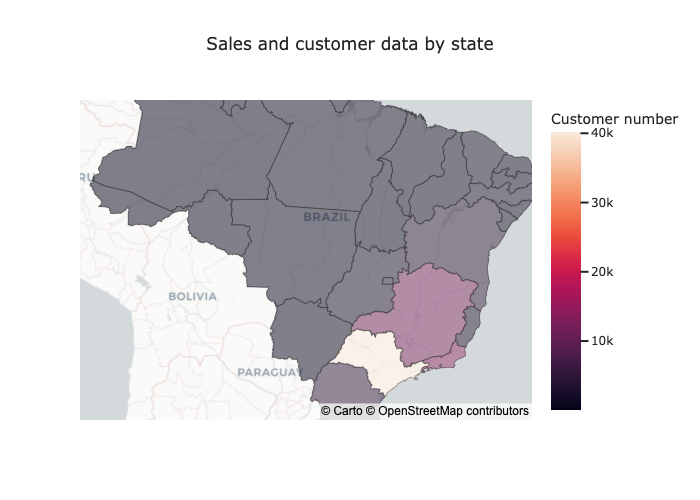

In [103]:
fig = px.choropleth_mapbox(
    df_geo_cus, 
    locations = 'State', #define the limits on the map/geography
    geojson = Brazil, #shape information
    color = "Customer number", #defining the color of the scale through the database
    hover_name = 'State', #the information in the box
    hover_data =["Customer number","Total sales","Order number"],
    mapbox_style = "carto-positron", #defining a new map style 
    center={"lat":-14, "lon": -55},#define the limits that will be plotted
    zoom = 3, #map view size
    opacity = 0.5,
    height = 500,
    title = "Sales and customer data by state"
    
)

fig.update_geos(fitbounds = "locations", visible = False)
#fig.show()
fig.show(renderer="png")
fig.write_html("visuals/map.html")

In [49]:
df_geo_cus.to_csv("geo_data.csv")

## Seller

Sales per seller

In [63]:
order_per_seller = df_order_items.groupby('seller_id')['order_id'].nunique().reset_index()
order_per_seller.rename(columns={'order_id':'no_of_orders'}, inplace=True)
order_per_seller.describe()

,no_of_orders
count,3095.000000
mean,32.313409
std,105.139763
min,1.000000
25%,2.000000
50%,6.000000
75%,21.500000
max,1854.000000


In [64]:
item_per_seller = df_order_items.groupby('seller_id')['order_id'].count().reset_index()
item_per_seller.rename(columns={'order_id':'no_of_items'}, inplace=True)
item_per_seller.describe()

,no_of_items
count,3095.000000
mean,36.397415
std,119.193461
min,1.000000
25%,2.000000
50%,8.000000
75%,24.000000
max,2033.000000


In [65]:
sales_per_seller = df_order_items.groupby('seller_id')['price'].sum().reset_index()
sales_per_seller.rename(columns={'price':'sales'}, inplace=True)
sales_per_seller.describe()

,sales
count,3095.000000
mean,4391.484233
std,13921.997192
min,3.500000
25%,208.850000
50%,821.480000
75%,3280.830000
max,229472.630000


Best sellers

In [66]:
no_products = df_order_items.groupby('product_id')['order_id'].count().reset_index()
no_products.rename(columns={'order_id':'number'}, inplace=True)
no_products.describe()

,number
count,32951.000000
mean,3.418713
std,10.619709
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,527.000000


## Product

- product_category_name: root category of product, in Portuguese
- product_name_lenght: number of characters extracted from the product name
- product_description_lenght: number of characters extracted from the product description

In [67]:
df_products = pd.read_csv("olist_products_dataset.csv")
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [68]:
df_order_items = df_order_items.merge(df_products, how = "left", on = "product_id")

In [69]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [70]:
product_cate = df_order_items.groupby(["product_category_name"]).agg({'order_id':"count", "price":"sum"}).reset_index()
product_cate

,product_category_name,order_id,price
0,agro_industria_e_comercio,212,72530.47
1,alimentos,510,29393.41
2,alimentos_bebidas,278,15179.48
3,artes,209,24202.64
4,artes_e_artesanato,24,1814.01
...,...,...,...
68,sinalizacao_e_seguranca,199,21509.23
69,tablets_impressao_imagem,83,7528.41
70,telefonia,4545,323667.53
71,telefonia_fixa,264,59583.00


In [71]:
df_translation = pd.read_csv("product_category_name_translation.csv")
df_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [72]:
product_cate = product_cate.merge(df_translation, how = "left", on = "product_category_name")
product_cate

,product_category_name,order_id,price,product_category_name_english
0,agro_industria_e_comercio,212,72530.47,agro_industry_and_commerce
1,alimentos,510,29393.41,food
2,alimentos_bebidas,278,15179.48,food_drink
3,artes,209,24202.64,art
4,artes_e_artesanato,24,1814.01,arts_and_craftmanship
...,...,...,...,...
68,sinalizacao_e_seguranca,199,21509.23,signaling_and_security
69,tablets_impressao_imagem,83,7528.41,tablets_printing_image
70,telefonia,4545,323667.53,telephony
71,telefonia_fixa,264,59583.00,fixed_telephony


In [74]:
fig = px.pie(product_cate , values='order_id', names='product_category_name_english', 
             title='Order number by product category')

fig.update_layout(showlegend=False, )
fig.show()

Export data for Segmentation analysis & building dashboard:

In [118]:
df_all.to_csv("combined_data.csv")